In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot

In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [2]:
# Here We Convert Minutely Data to Daily Form 

def dateparse (time_in_secs):    
    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

## Reading Data and Preparation

In [3]:
df = pd.read_csv("data.csv",parse_dates=[0], date_parser=dateparse)

In [16]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
date,,,,,,,,
2011-12-31 10:52:00+00:00,2011-12-31 10:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 10:53:00+00:00,2011-12-31 10:53:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 10:54:00+00:00,2011-12-31 10:54:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 10:55:00+00:00,2011-12-31 10:55:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 10:56:00+00:00,2011-12-31 10:56:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [7]:
df.isnull().sum()

Timestamp                  0
Open                 1241716
High                 1241716
Low                  1241716
Close                1241716
Volume_(BTC)         1241716
Volume_(Currency)    1241716
Weighted_Price       1241716
dtype: int64

In [13]:
df['date'] = pd.to_datetime(df['Timestamp'], format="%Y-%d-%m %H:%M")
df['date'] = pd.to_datetime(df['date'])
df         = df.set_index(['date'])

In [15]:
df.Low[df.Low==1.5]     = 540   # wrong data 
df.Close[df.Close==1.5] = 540   # wrong data
df.fillna(method='ffill', inplace = True)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
# Close 

df_Close = df[["Close"]]
df_Close = df_Close.resample('D')[['Close']].last()

In [18]:
# Low 

df_Low = df[["Low"]]
df_Low = df_Low.resample('D')['Low'].agg(['min'])

In [19]:
# High

df_High = df[["High"]]
df_High = df_High.resample('D')['High'].agg(['max'])

In [20]:
df_daily = pd.concat([df_Low,df_High,df_Close],axis=1)

In [21]:
df_daily.head()

,min,max,Close
date,,,
2011-12-31 00:00:00+00:00,4.39,4.58,4.58
2012-01-01 00:00:00+00:00,4.58,4.84,4.84
2012-01-02 00:00:00+00:00,4.84,5.00,5.00
2012-01-03 00:00:00+00:00,5.00,5.32,5.29
2012-01-04 00:00:00+00:00,4.93,5.57,5.57


We took these periods to examine in this file. These Periods represent increasment periods. We didn't examine bear market because for us corrections which are in bull market, are important.

2011-12-30 : 2013-04-16 --> Increasment Periods

2015-01-14 : 2017-12-16 --> Increasment Periods

2018-12-16 : 2019-06-26 --> Increasment Periods

2020-03-12 : 2020-09-14 --> Increasment Periods

In [22]:
firstInc  = df_daily.loc["2011-12-30" : "2013-04-16"]
secondInc = df_daily.loc["2015-01-14" : "2017-12-16"]
thirdInc  = df_daily.loc["2018-12-16" : "2019-06-26"]
fourthInc = df_daily.loc["2020-03-12" : "2020-09-14"]

firstInc =firstInc.rename(  columns ={"min": "Low", "max": "High"})
secondInc=secondInc.rename( columns={"min": "Low", "max": "High"})
thirdInc =thirdInc.rename(  columns ={"min": "Low", "max": "High"})
fourthInc=fourthInc.rename( columns={"min": "Low", "max": "High"})

season = pd.concat([firstInc,secondInc,thirdInc,fourthInc],axis=0)
season =season.rename(columns={"min": "Low", "max": "High"})

In [23]:
season.head()

,Low,High,Close
date,,,
2011-12-31 00:00:00+00:00,4.39,4.58,4.58
2012-01-01 00:00:00+00:00,4.58,4.84,4.84
2012-01-02 00:00:00+00:00,4.84,5.00,5.00
2012-01-03 00:00:00+00:00,5.00,5.32,5.29
2012-01-04 00:00:00+00:00,4.93,5.57,5.57


### Algorithm

In [24]:
def calculate(season): 
    
    global k
    bottomPrice  = 10000000000    
    peakPrice   = season["Close"][0]
    peakDayDate = season.index[0]
    i = 0

    corrections = {"Peak Date":[],"Peak Price":[],"Bottom Date":[], "Bottom Price" : [] , "Correction Percentage":[] , "Correction Duration":[], "Recovery Duration":[] ,"Peak Date2" :[]}


    for x in range(len(season)-2):

        nextDayDate  = season.index[1 + i]
        nextDayPrice = season.iloc[1 + i]

        if peakPrice >= nextDayPrice["High"]:      

            if bottomPrice > nextDayPrice["Low"]:

                bottomPrice = nextDayPrice["Low"]
                bottomDate  = nextDayDate


        else:

            if (((peakPrice - bottomPrice) /peakPrice))*100 > 15:
                correc = (((peakPrice - bottomPrice) / peakPrice))*100
                corrections["Peak Date"].append('{0:%Y}-{0:%m}-{0:%d} {0:%H}:{0:%M}'.format(peakDayDate, "year","month","day","hour","minute"))
                corrections["Peak Date2"].append(peakDayDate)
                corrections["Peak Price"].append(peakPrice)
                corrections["Bottom Date"].append('{0:%Y}-{0:%m}-{0:%d} {0:%H}:{0:%M}'.format(bottomDate, "year","month","day","hour","minute"))
                corrections["Bottom Price"].append(bottomPrice)
                corrections["Correction Percentage"].append(correc)
                duration = bottomDate - peakDayDate
                corrections["Correction Duration"].append(duration)
                corrections["Recovery Duration"].append(nextDayDate - 1)

            peakPrice  = nextDayPrice["High"]
            peakDayDate= nextDayDate
            bottomPrice = 10000000


        i = i + 1
    for i in range(len(corrections["Peak Date"])):
        
        
        print("%d- Peak Date : %s --> Bottom Date : %s \n    Peak Price : %f      --> Bottom Price : %f  \n    Correction Percentage : %f   \n    Correction Duration : %s Days     Recovery Duration : %s Days "
              %(k,corrections["Peak Date"][i],corrections["Bottom Date"][i],corrections["Peak Price"][i],corrections["Bottom Price"][i],corrections["Correction Percentage"][i],corrections["Correction Duration"][i].days,(corrections["Recovery Duration"][i] - corrections["Peak Date2"][i]).days))
        
            
        print("="*68)
        
        
        k = k +1
        
    return corrections


# We Get the Results Here

In [25]:
k = 1
first = calculate(firstInc)
second = calculate(secondInc)
third = calculate(thirdInc)
fourth = calculate(fourthInc)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`


1- Peak Date : 2012-01-12 00:00 --> Bottom Date : 2012-01-27 00:00 
    Peak Price : 7.380000      --> Bottom Price : 3.800000  
    Correction Percentage : 48.509485   
    Correction Duration : 15 Days     Recovery Duration : 182 Days 
2- Peak Date : 2012-08-17 00:00 --> Bottom Date : 2012-08-20 00:00 
    Peak Price : 16.410000      --> Bottom Price : 7.100000  
    Correction Percentage : 56.733699   
    Correction Duration : 3 Days     Recovery Duration : 156 Days 
3- Peak Date : 2013-01-24 00:00 --> Bottom Date : 2013-01-25 00:00 
    Peak Price : 19.200000      --> Bottom Price : 16.120000  
    Correction Percentage : 16.041667   
    Correction Duration : 1 Days     Recovery Duration : 4 Days 
4- Peak Date : 2013-03-06 00:00 --> Bottom Date : 2013-03-07 00:00 
    Peak Price : 49.170000      --> Bottom Price : 33.000000  
    Correction Percentage : 32.885906   
    Correction Duration : 1 Days     Recovery Duration : 12 Days 
5- Peak Date : 2013-03-21 00:00 --> Bottom Date :

## Percentage Graph of Corrections

In [33]:
first_graph = pd.DataFrame.from_dict(first)
second_graph = pd.DataFrame.from_dict(second)
third_graph = pd.DataFrame.from_dict(third)
fourth_graph = pd.DataFrame.from_dict(fourth)

correction_Graph = pd.concat([first_graph,second_graph,third_graph,fourth_graph],axis=0)
correction_Graph["Peak Date"] = correction_Graph["Peak Date"].apply(lambda x: x.split(" ")[0])


correction_Graph["Peak Date"] = correction_Graph["Peak Date"].apply(pd.Timestamp)
correction_Graph = correction_Graph.set_index("Peak Date")

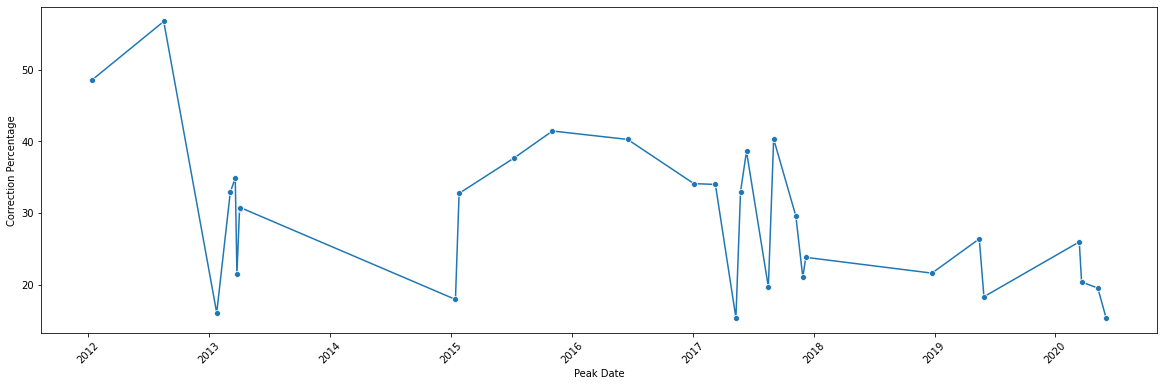

In [34]:
plt.subplots(figsize=(20,6))
plt.xticks(rotation=45)
line = sns.lineplot(data=correction_Graph, x=correction_Graph.index, y="Correction Percentage", marker="o")